In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import permutations

In [2]:
x_data = np.float32(np.random.rand(1,25))
y_data = np.dot(0.70, x_data) + 0.3 + np.random.rand(1,25)/3.0

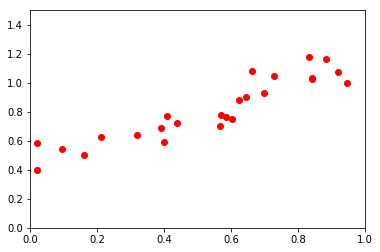

In [3]:
def plot_point(x,y):
    plt.plot(x,y,"ro")
    plt.axis([0, 1, 0, 1.5])
    plt.show()
plot_point(x_data[0],y_data[0])

In [4]:
w = tf.Variable(np.random.rand(1,1),dtype=tf.float32)
b = tf.Variable(np.random.rand(1),dtype=tf.float32)
y = tf.matmul(w, x_data) + b

In [5]:
loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

99 [[0.72106504]] [0.42866626] 0.006934573
199 [[0.72078735]] [0.42882454] 0.006934566
299 [[0.72078705]] [0.42882472] 0.006934567


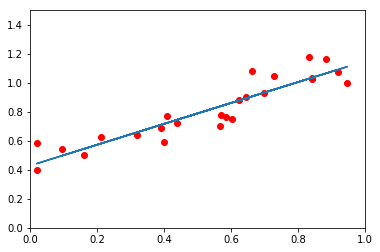

In [7]:
for step in xrange(0, 300):
    sess.run(train)
    if (step+1) % 100 == 0:        
        print step, sess.run(w), sess.run(b), sess.run(loss)
    if step == 299:
        plt.plot(x_data,y_data,"ro")
        plt.axis([0, 1, 0, 1.5])
        plt.plot(x_data[0],sess.run(y)[0])

In [8]:
x_data = np.float32(np.random.rand(1,25))
y_data = np.dot(0.75, x_data) + 0.75

vls = np.arange(0,150,1.5)/100.0
vls_set = np.array(list(permutations(vls,2)))

X = vls_set.T[0].reshape(1,-1)
Y = vls_set.T[1].reshape(1,-1)
y_r = np.matmul(x_data.T,X) + Y

In [9]:
loss = np.square(y_r.T - np.tile(y_data,(9900,1)))
Z = np.mean(loss,1)

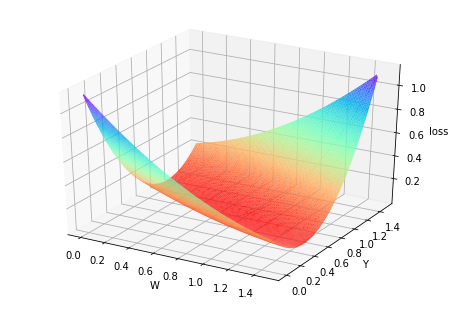

In [10]:
figure = plt.figure()
ax = Axes3D(figure)
ax.set_xlabel("W")
ax.set_ylabel("Y")
ax.set_zlabel("loss")
ax.plot_trisurf(X[0], Y[0], Z, cmap = plt.cm.rainbow_r)